# **Task #3**

In [192]:
# import the libraries

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

Logistic regression functions

In [193]:
# sigmoid
def sigmoid(z):
    s = 1./(1.+np.exp(-z))
    return s


# initialize_with_zeros
def initialize_with_zeros(dim):
    """This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0."""
    w = np.zeros((dim,1))
    b = 0.
    return w, b


# propagate

def propagate(w, b, X, Y):
    """Implement the cost function and its gradient for the propagation explained above"""
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost


# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """This function optimizes w and b by running a gradient descent algorithm"""
    costs = []
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs


    # predict

def predict(w, b, X):
    """Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)"""
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

Logistic regression functions merged into one model

In [194]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """Builds the logistic regression model by calling the function we've implemented previously"""
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Loading data

In [195]:
from google.colab import drive
drive.mount('/content/drive/')

bioresponse = pd.read_csv('/content/drive/My Drive/bioresponse.csv', header=0, sep=',')
bioresponse

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.000000,0.00,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.000000,0.00,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.000000,0.00,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.000000,0.00,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,0.000000,0.0000,0.000000,0.071800,0.362006,0.229374,0.603893,0.129706,0.092400,0.036100,0.00473,0.069000,1,0.00,0.486439,0.783710,1,1,0.000000,0.364694,0.136861,0.047300,0.100295,0.00000,0.000000,0.000000,0.00,0.223324,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,0.085200,0.2500,0.064500,0.121309,0.347521,0.250846,0.660747,0.221975,0.167944,0.065700,0.00939,0.172414,1,0.00,0.390864,0.815279,0,1,0.000000,0.153533,0.127563,0.122141,0.104815,0.08000,0.191429,0.146735,0.00,0.101137,0.075100,...,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,0.624027,0.1875,0.064500,0.091700,0.519094,0.243037,0.691896,0.215831,0.338637,0.290643,0.04450,0.103448,1,0.00,0.590995,0.581372,0,0,0.333333,0.128839,0.357203,0.077600,0.028500,0.06200,0.308468,0.166667,0.00,0.019900,0.377263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,0.37293

Train/test splitting

In [196]:
y = bioresponse['Activity'].values
X = bioresponse.drop("Activity", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

y_train = np.asarray(y_train).T
X_train = np.asarray(X_train).T

y_test = np.asarray(y_test).T
X_test = np.asarray(X_test).T

Applying the logistic regression to predict the biological response of a molecule 

In [197]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.680547
Cost after iteration 200: 0.673636
Cost after iteration 300: 0.667458
Cost after iteration 400: 0.661693
Cost after iteration 500: 0.656284
Cost after iteration 600: 0.651192
Cost after iteration 700: 0.646387
Cost after iteration 800: 0.641843
Cost after iteration 900: 0.637534
Cost after iteration 1000: 0.633443
Cost after iteration 1100: 0.629549
Cost after iteration 1200: 0.625838
Cost after iteration 1300: 0.622295
Cost after iteration 1400: 0.618907
Cost after iteration 1500: 0.615663
Cost after iteration 1600: 0.612552
Cost after iteration 1700: 0.609566
Cost after iteration 1800: 0.606695
Cost after iteration 1900: 0.603932
train accuracy: 73.16032705296836 %
test accuracy: 71.96162046908316 %


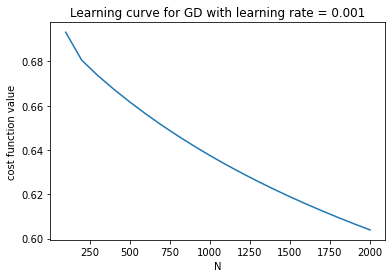

In [198]:
n_iter = []
for i in range(1, d["num_iterations"]+1):
    if i % 100 == 0:
        n_iter = np.append(n_iter, i)

GD_costs = np.array(d["costs"])

plt.plot(n_iter, GD_costs)
plt.xlabel("N")
plt.ylabel("cost function value")
plt.title("Learning curve for GD with learning rate = 0.001")
plt.show()

Applying models with different values of the learning rate

In [199]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.0001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.690952
Cost after iteration 200: 0.689130
Cost after iteration 300: 0.687589
Cost after iteration 400: 0.686259
Cost after iteration 500: 0.685088
Cost after iteration 600: 0.684037
Cost after iteration 700: 0.683077
Cost after iteration 800: 0.682187
Cost after iteration 900: 0.681350
Cost after iteration 1000: 0.680554
Cost after iteration 1100: 0.679790
Cost after iteration 1200: 0.679052
Cost after iteration 1300: 0.678334
Cost after iteration 1400: 0.677631
Cost after iteration 1500: 0.676943
Cost after iteration 1600: 0.676265
Cost after iteration 1700: 0.675597
Cost after iteration 1800: 0.674937
Cost after iteration 1900: 0.674285
train accuracy: 55.31461073586918 %
test accuracy: 57.569296375266525 %


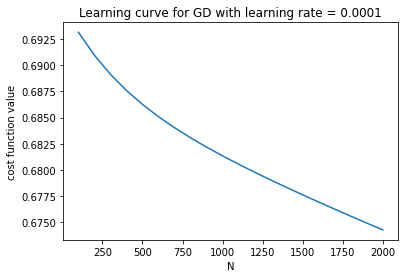

In [200]:
n_iter = []
for i in range(1, d["num_iterations"]+1):
    if i % 100 == 0:
        n_iter = np.append(n_iter, i)

plt.plot(n_iter, np.array(d["costs"]))
plt.xlabel("N")
plt.ylabel("cost function value")
plt.title("Learning curve for GD with learning rate = 0.0001")
plt.show()

In [201]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.633396
Cost after iteration 200: 0.601225
Cost after iteration 300: 0.578998
Cost after iteration 400: 0.562293
Cost after iteration 500: 0.549066
Cost after iteration 600: 0.538222
Cost after iteration 700: 0.529108
Cost after iteration 800: 0.521302
Cost after iteration 900: 0.514515
Cost after iteration 1000: 0.508539
Cost after iteration 1100: 0.503222
Cost after iteration 1200: 0.498449
Cost after iteration 1300: 0.494131
Cost after iteration 1400: 0.490196
Cost after iteration 1500: 0.486591
Cost after iteration 1600: 0.483268
Cost after iteration 1700: 0.480191
Cost after iteration 1800: 0.477329
Cost after iteration 1900: 0.474657
train accuracy: 78.99040170636331 %
test accuracy: 76.22601279317698 %


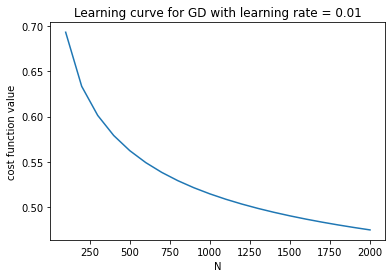

In [202]:
n_iter = []
for i in range(1, d["num_iterations"]+1):
    if i % 100 == 0:
        n_iter = np.append(n_iter, i)

plt.plot(n_iter, np.array(d["costs"]))
plt.xlabel("N")
plt.ylabel("cost function value")
plt.title("Learning curve for GD with learning rate = 0.01")
plt.show()

In [203]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.1, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.508360
Cost after iteration 200: 0.472067
Cost after iteration 300: 0.453298
Cost after iteration 400: 0.440874
Cost after iteration 500: 0.431608
Cost after iteration 600: 0.424210
Cost after iteration 700: 0.418046
Cost after iteration 800: 0.412757
Cost after iteration 900: 0.408123
Cost after iteration 1000: 0.403997
Cost after iteration 1100: 0.400280
Cost after iteration 1200: 0.396896
Cost after iteration 1300: 0.393790
Cost after iteration 1400: 0.390922
Cost after iteration 1500: 0.388256
Cost after iteration 1600: 0.385767
Cost after iteration 1700: 0.383432
Cost after iteration 1800: 0.381234
Cost after iteration 1900: 0.379157
train accuracy: 84.18059011731248 %
test accuracy: 76.75906183368869 %


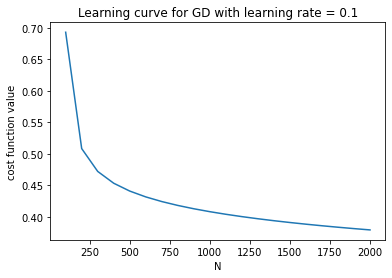

In [204]:
n_iter = []
for i in range(1, d["num_iterations"]+1):
    if i % 100 == 0:
        n_iter = np.append(n_iter, i)

plt.plot(n_iter, np.array(d["costs"]))
plt.xlabel("N")
plt.ylabel("cost function value")
plt.title("Learning curve for GD with learning rate = 0.1")
plt.show()

In [229]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.999, print_cost = True)

(1776, 2813)
(2813,)
Cost after iteration 0: 0.693147
Cost after iteration 100: 2.257727


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 200: 0.585844
Cost after iteration 300: 1.253222
Cost after iteration 400: 0.395845
Cost after iteration 500: 0.613896
Cost after iteration 600: 0.695665
Cost after iteration 700: 0.673796
Cost after iteration 800: 0.861178
Cost after iteration 900: 0.959474
Cost after iteration 1000: 0.704546
Cost after iteration 1100: 0.727626
Cost after iteration 1200: 0.486464
Cost after iteration 1300: 1.939589
Cost after iteration 1400: 0.728857
Cost after iteration 1500: 1.455095
Cost after iteration 1600: 1.233441
Cost after iteration 1700: 0.798386
Cost after iteration 1800: 0.733491
Cost after iteration 1900: 0.939916
train accuracy: 82.82971916103804 %
test accuracy: 74.09381663113007 %


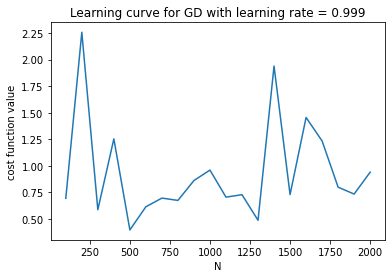

In [230]:
n_iter = []
for i in range(1, d["num_iterations"]+1):
    if i % 100 == 0:
        n_iter = np.append(n_iter, i)

plt.plot(n_iter, np.array(d["costs"]))
plt.xlabel("N")
plt.ylabel("cost function value")
plt.title("Learning curve for GD with learning rate = 0.999")
plt.show()

As the value of learning_rate increased, so did the test accuracy (except for the last two experiments)

Modifying
 optimize() function to implement the stochastic gradient descent (SGD) method

In [231]:
from pandas._libs import index
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False, batch_size = 150):
    """This function optimizes w and b by running a stochastic gradient descent algorithm"""
    costs = []
    cost = 0
    dw = []
    db = 0

    print(np.shape(X))
    print(np.shape(Y))
    for i in range(num_iterations):


        #idx = np.random.choice(np.arange(Y.shape[1]), batch_size, replace=False)
        idx = np.random.randint(0, X.shape[1] - batch_size)

        temp_X = X[:, idx:idx+batch_size]
        temp_Y = Y[idx:idx+batch_size]

        # Cost and gradient calculation 
        grads, cost = propagate(w,b,temp_X,temp_Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db

        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs

Using SGD optimization method to predict the biological response of a molecule 

In [232]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

(1776, 2813)
(2813,)
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.674346
Cost after iteration 200: 0.675461
Cost after iteration 300: 0.680574
Cost after iteration 400: 0.655171
Cost after iteration 500: 0.669073
Cost after iteration 600: 0.641146
Cost after iteration 700: 0.632367
Cost after iteration 800: 0.648541
Cost after iteration 900: 0.633353
Cost after iteration 1000: 0.639855
Cost after iteration 1100: 0.637616
Cost after iteration 1200: 0.649709
Cost after iteration 1300: 0.615929
Cost after iteration 1400: 0.607150
Cost after iteration 1500: 0.593182
Cost after iteration 1600: 0.610373
Cost after iteration 1700: 0.604916
Cost after iteration 1800: 0.599045
Cost after iteration 1900: 0.610753
train accuracy: 72.9825808745112 %
test accuracy: 72.0682302771855 %


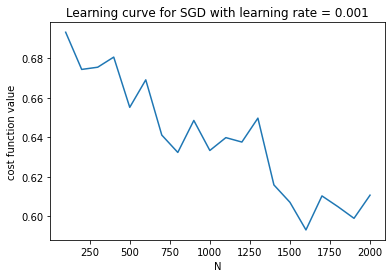

In [233]:
n_iter = []
for i in range(1, d["num_iterations"]+1):
    if i % 100 == 0:
        n_iter = np.append(n_iter, i)

SGD_costs = np.array(d["costs"])

plt.plot(n_iter, SGD_costs)
plt.xlabel("N")
plt.ylabel("cost function value")
plt.title("Learning curve for SGD with learning rate = 0.001")
plt.show()

Applying models with different values of the learning rate

In [234]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.0001, print_cost = True)

(1776, 2813)
(2813,)
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.692838
Cost after iteration 200: 0.690344
Cost after iteration 300: 0.688997
Cost after iteration 400: 0.682467
Cost after iteration 500: 0.687842
Cost after iteration 600: 0.682827
Cost after iteration 700: 0.679827
Cost after iteration 800: 0.678001
Cost after iteration 900: 0.671886
Cost after iteration 1000: 0.676820
Cost after iteration 1100: 0.684835
Cost after iteration 1200: 0.681172
Cost after iteration 1300: 0.685442
Cost after iteration 1400: 0.673095
Cost after iteration 1500: 0.688582
Cost after iteration 1600: 0.670507
Cost after iteration 1700: 0.668276
Cost after iteration 1800: 0.677378
Cost after iteration 1900: 0.668829
train accuracy: 54.959118378954855 %
test accuracy: 57.0362473347548 %


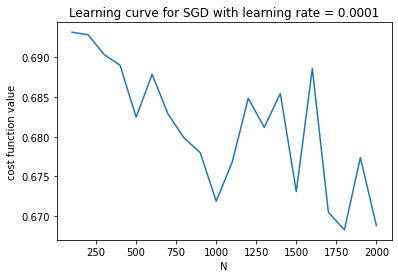

In [235]:
n_iter = []
for i in range(1, d["num_iterations"]+1):
    if i % 100 == 0:
        n_iter = np.append(n_iter, i)

plt.plot(n_iter, np.array(d["costs"]))
plt.xlabel("N")
plt.ylabel("cost function value")
plt.title("Learning curve for SGD with learning rate = 0.0001")
plt.show()

In [236]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = True)

(1776, 2813)
(2813,)
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.627054
Cost after iteration 200: 0.597534
Cost after iteration 300: 0.563419
Cost after iteration 400: 0.563382
Cost after iteration 500: 0.516566
Cost after iteration 600: 0.571955
Cost after iteration 700: 0.560732
Cost after iteration 800: 0.501849
Cost after iteration 900: 0.529181
Cost after iteration 1000: 0.506578
Cost after iteration 1100: 0.512296
Cost after iteration 1200: 0.496742
Cost after iteration 1300: 0.547084
Cost after iteration 1400: 0.487607
Cost after iteration 1500: 0.503277
Cost after iteration 1600: 0.507857
Cost after iteration 1700: 0.501122
Cost after iteration 1800: 0.525623
Cost after iteration 1900: 0.408127
train accuracy: 78.99040170636331 %
test accuracy: 76.01279317697228 %


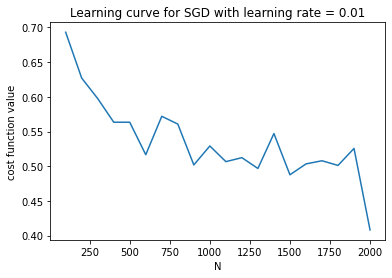

In [237]:
n_iter = []
for i in range(1, d["num_iterations"]+1):
    if i % 100 == 0:
        n_iter = np.append(n_iter, i)

plt.plot(n_iter, np.array(d["costs"]))
plt.xlabel("N")
plt.ylabel("cost function value")
plt.title("Learning curve for SGD with learning rate = 0.01")
plt.show()

In [238]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.1, print_cost = True)

(1776, 2813)
(2813,)
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.533182
Cost after iteration 200: 0.469841
Cost after iteration 300: 0.443848
Cost after iteration 400: 0.430365
Cost after iteration 500: 0.476887
Cost after iteration 600: 0.372889
Cost after iteration 700: 0.337948
Cost after iteration 800: 0.392558
Cost after iteration 900: 0.381230
Cost after iteration 1000: 0.388820
Cost after iteration 1100: 0.392375
Cost after iteration 1200: 0.385849
Cost after iteration 1300: 0.440929
Cost after iteration 1400: 0.403054
Cost after iteration 1500: 0.434845
Cost after iteration 1600: 0.452307
Cost after iteration 1700: 0.397933
Cost after iteration 1800: 0.383067
Cost after iteration 1900: 0.416198
train accuracy: 84.14504088162104 %
test accuracy: 77.9317697228145 %


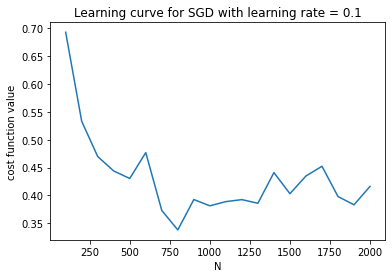

In [239]:
n_iter = []
for i in range(1, d["num_iterations"]+1):
    if i % 100 == 0:
        n_iter = np.append(n_iter, i)

plt.plot(n_iter, np.array(d["costs"]))
plt.xlabel("N")
plt.ylabel("cost function value")
plt.title("Learning curve for SGD with learning rate = 0.1")
plt.show()

In [240]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.999, print_cost = True)

(1776, 2813)
(2813,)
Cost after iteration 0: 0.693147
Cost after iteration 100: 1.306825


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 200: 1.288975
Cost after iteration 300: 2.191544
Cost after iteration 400: 1.013054
Cost after iteration 500: 0.556860
Cost after iteration 600: 1.275468
Cost after iteration 700: 0.751834
Cost after iteration 800: 2.595421
Cost after iteration 900: 1.022653
Cost after iteration 1000: 0.466919
Cost after iteration 1100: 0.524671
Cost after iteration 1200: 0.570135
Cost after iteration 1300: 0.993332
Cost after iteration 1400: 1.317455
Cost after iteration 1500: 0.606705
Cost after iteration 1600: 0.615099
Cost after iteration 1700: 1.209400
Cost after iteration 1800: 0.271242
Cost after iteration 1900: 0.323491
train accuracy: 80.02132954141486 %
test accuracy: 74.09381663113007 %


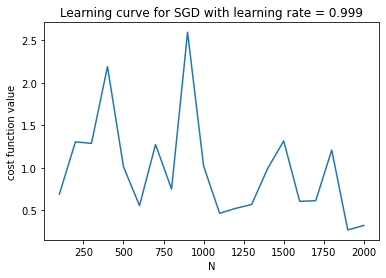

In [241]:
n_iter = []
for i in range(1, d["num_iterations"]+1):
    if i % 100 == 0:
        n_iter = np.append(n_iter, i)

plt.plot(n_iter, np.array(d["costs"]))
plt.xlabel("N")
plt.ylabel("cost function value")
plt.title("Learning curve for SGD with learning rate = 0.999")
plt.show()

As the value of learning_rate increased, so did the test accuracy (except for the last one experiment)

ADAM optimization method

Modifying optimize() function to apply adam optimization method

In [242]:
class AdamOptim():
    def __init__(self, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = 0, 0
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
    def update(self, t, w, b, dw, db):

        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db

        ## rms beta 2
        # *** weights *** #
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)

        ## update weights and biases
        w = w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        b = b - self.eta*(m_db_corr/(np.sqrt(abs(v_db_corr))+self.epsilon))
        return w, b


def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """This function optimizes w and b by running adam algorithm"""
    
    adam = AdamOptim()
    t = 1 
    costs = []
    for i in range(num_iterations):
      
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w, b = adam.update(t,w=w, b=b, dw=dw, db=db)

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs

Applying the ADAM optimization to predict the biological response of a molecule 

In [243]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.363619
Cost after iteration 200: 0.328739
Cost after iteration 300: 0.308450
Cost after iteration 400: 0.294061
Cost after iteration 500: 0.282867
Cost after iteration 600: 0.273662
Cost after iteration 700: 0.265811
Cost after iteration 800: 0.258940
Cost after iteration 900: 0.252808
Cost after iteration 1000: 0.247254
Cost after iteration 1100: 0.242163
Cost after iteration 1200: 0.237452
Cost after iteration 1300: 0.233057
Cost after iteration 1400: 0.228930
Cost after iteration 1500: 0.225033
Cost after iteration 1600: 0.221333
Cost after iteration 1700: 0.217807
Cost after iteration 1800: 0.214434
Cost after iteration 1900: 0.211196
train accuracy: 92.89015286171347 %
test accuracy: 74.09381663113007 %


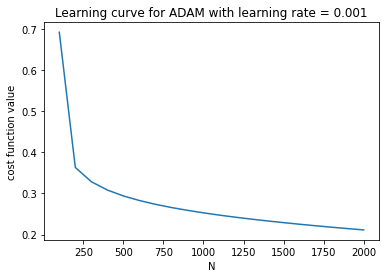

In [244]:
n_iter = []
for i in range(1, d["num_iterations"]+1):
    if i % 100 == 0:
        n_iter = np.append(n_iter, i)

ADAM_costs = np.array(d["costs"])

plt.plot(n_iter, ADAM_costs)
plt.xlabel("N")
plt.ylabel("cost function value")
plt.title("Learning curve for ADAM with learning rate = 0.001")
plt.show()

Applying models with different values of the learning rate

In [245]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.0001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.363619
Cost after iteration 200: 0.328739
Cost after iteration 300: 0.308450
Cost after iteration 400: 0.294061
Cost after iteration 500: 0.282867
Cost after iteration 600: 0.273662
Cost after iteration 700: 0.265811
Cost after iteration 800: 0.258940
Cost after iteration 900: 0.252808
Cost after iteration 1000: 0.247254
Cost after iteration 1100: 0.242163
Cost after iteration 1200: 0.237452
Cost after iteration 1300: 0.233057
Cost after iteration 1400: 0.228930
Cost after iteration 1500: 0.225033
Cost after iteration 1600: 0.221333
Cost after iteration 1700: 0.217807
Cost after iteration 1800: 0.214434
Cost after iteration 1900: 0.211196
train accuracy: 92.89015286171347 %
test accuracy: 74.09381663113007 %


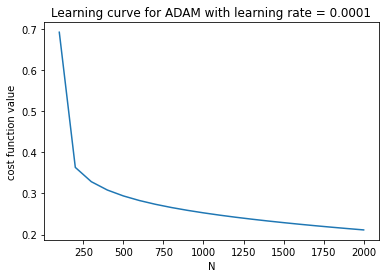

In [246]:
n_iter = []
for i in range(1, d["num_iterations"]+1):
    if i % 100 == 0:
        n_iter = np.append(n_iter, i)

plt.plot(n_iter, np.array(d["costs"]))
plt.xlabel("N")
plt.ylabel("cost function value")
plt.title("Learning curve for ADAM with learning rate = 0.0001")
plt.show()

In [247]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.363619
Cost after iteration 200: 0.328739
Cost after iteration 300: 0.308450
Cost after iteration 400: 0.294061
Cost after iteration 500: 0.282867
Cost after iteration 600: 0.273662
Cost after iteration 700: 0.265811
Cost after iteration 800: 0.258940
Cost after iteration 900: 0.252808
Cost after iteration 1000: 0.247254
Cost after iteration 1100: 0.242163
Cost after iteration 1200: 0.237452
Cost after iteration 1300: 0.233057
Cost after iteration 1400: 0.228930
Cost after iteration 1500: 0.225033
Cost after iteration 1600: 0.221333
Cost after iteration 1700: 0.217807
Cost after iteration 1800: 0.214434
Cost after iteration 1900: 0.211196
train accuracy: 92.89015286171347 %
test accuracy: 74.09381663113007 %


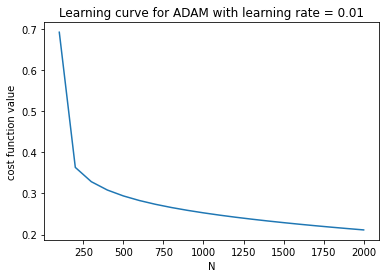

In [248]:
n_iter = []
for i in range(1, d["num_iterations"]+1):
    if i % 100 == 0:
        n_iter = np.append(n_iter, i)

plt.plot(n_iter, np.array(d["costs"]))
plt.xlabel("N")
plt.ylabel("cost function value")
plt.title("Learning curve for ADAM with learning rate = 0.01")
plt.show()

In [249]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.1, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.363619
Cost after iteration 200: 0.328739
Cost after iteration 300: 0.308450
Cost after iteration 400: 0.294061
Cost after iteration 500: 0.282867
Cost after iteration 600: 0.273662
Cost after iteration 700: 0.265811
Cost after iteration 800: 0.258940
Cost after iteration 900: 0.252808
Cost after iteration 1000: 0.247254
Cost after iteration 1100: 0.242163
Cost after iteration 1200: 0.237452
Cost after iteration 1300: 0.233057
Cost after iteration 1400: 0.228930
Cost after iteration 1500: 0.225033
Cost after iteration 1600: 0.221333
Cost after iteration 1700: 0.217807
Cost after iteration 1800: 0.214434
Cost after iteration 1900: 0.211196
train accuracy: 92.89015286171347 %
test accuracy: 74.09381663113007 %


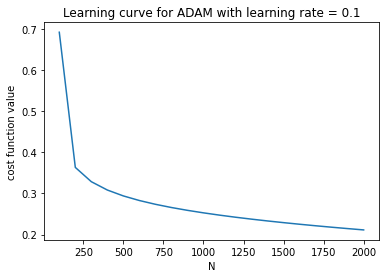

In [250]:
n_iter = []
for i in range(1, d["num_iterations"]+1):
    if i % 100 == 0:
        n_iter = np.append(n_iter, i)

plt.plot(n_iter, np.array(d["costs"]))
plt.xlabel("N")
plt.ylabel("cost function value")
plt.title("Learning curve for ADAM with learning rate = 0.1")
plt.show()

In [251]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.999, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.363619
Cost after iteration 200: 0.328739
Cost after iteration 300: 0.308450
Cost after iteration 400: 0.294061
Cost after iteration 500: 0.282867
Cost after iteration 600: 0.273662
Cost after iteration 700: 0.265811
Cost after iteration 800: 0.258940
Cost after iteration 900: 0.252808
Cost after iteration 1000: 0.247254
Cost after iteration 1100: 0.242163
Cost after iteration 1200: 0.237452
Cost after iteration 1300: 0.233057
Cost after iteration 1400: 0.228930
Cost after iteration 1500: 0.225033
Cost after iteration 1600: 0.221333
Cost after iteration 1700: 0.217807
Cost after iteration 1800: 0.214434
Cost after iteration 1900: 0.211196
train accuracy: 92.89015286171347 %
test accuracy: 74.09381663113007 %


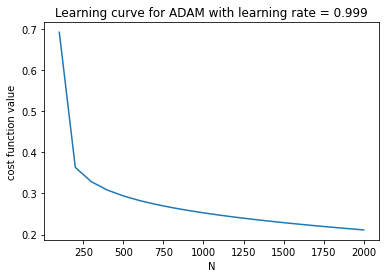

In [252]:
n_iter = []
for i in range(1, d["num_iterations"]+1):
    if i % 100 == 0:
        n_iter = np.append(n_iter, i)

plt.plot(n_iter, np.array(d["costs"]))
plt.xlabel("N")
plt.ylabel("cost function value")
plt.title("Learning curve for ADAM with learning rate = 0.999")
plt.show()

Comparison of 3 implemented optimization methods

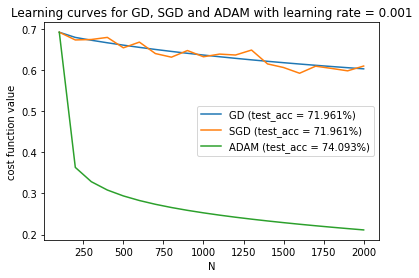

In [253]:
plt.plot(n_iter, GD_costs, n_iter, SGD_costs, n_iter, ADAM_costs)
plt.xlabel("N")
plt.ylabel("cost function value")
plt.title("Learning curves for GD, SGD and ADAM with learning rate = 0.001")
plt.legend(["GD (test_acc = 71.961%)", "SGD (test_acc = 71.961%)", "ADAM (test_acc = 74.093%)"])
plt.show()